## 1. Predicting Diabetes Onset Using Logistic Regression
   #### Dataset: 
Diabetes Dataset   
##### Preprocessing Steps:
Handle missing values if any.
Standardize features.
Encode categorical variables if any.
  #### Task:
Implement logistic regression to predict diabetes onset and evaluate the model using accuracy, precision, and recall.


In [1]:
import pandas as pd

df = pd.read_csv("D:\ML A-Z\ByteWise Fellowship\Datasets\diabetes.csv")

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
from sklearn.preprocessing import StandardScaler

features = df.drop(columns=['Outcome']) 
target = df['Outcome']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.75
Precision: 0.65
Recall: 0.67


## 2. Classifying Iris Species Using Decision Trees
   #### Dataset: 
Iris Dataset
   ##### Preprocessing Steps:
Handle missing values if any.
Standardize features.
Encode categorical variables if any.
  ##### Task: 
Implement a decision tree classifier to classify iris species and evaluate the model using confusion matrix and accuracy.


In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Display the first few rows of the dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [22]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, fill them (example with mean)
df.fillna(df.mean(), inplace=True)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [23]:
# Assuming the last column is the target and others are features
features = df.drop(columns=['species'])  # Replace 'species' with the actual target column name if different
target = df['species']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [24]:
# If the target variable is categorical, encode it
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_encoded, test_size=0.2, random_state=42)

In [26]:
# Initialize the decision tree classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# Make predictions
y_pred = model.predict(X_test)

Accuracy: 1.00


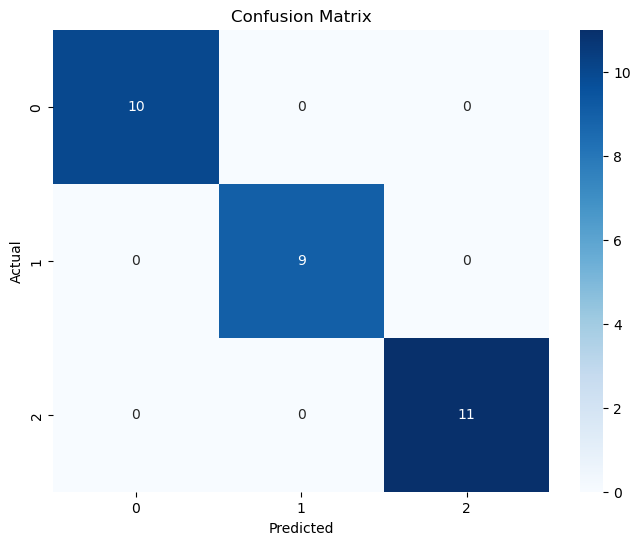

In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3. Predicting Titanic Survival Using Logistic Regression
  #### Dataset: 
Titanic Dataset
  ##### Preprocessing Steps:
Handle missing values (e.g., fill missing ages with median).
Encode categorical variables (e.g., one-hot encoding for embarked and gender).
Standardize numerical features.
  ##### Task:
Implement logistic regression to predict survival on the Titanic and evaluate the model using ROC-AUC.


In [52]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [53]:
df = pd.read_csv(r'D:\ML A-Z\ByteWise Fellowship\Datasets\titanic - titanic.csv')

# Display the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [54]:
# Fill missing 'Age' with median
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Fill missing 'Embarked' with most frequent
imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df[['Embarked']])

# Fill missing 'Fare' with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [55]:
# Define features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Separate the data into features and target variable
X = df[features]
y = df[target]

In [56]:
# Define preprocessing for numerical features (scaling) and categorical features (one-hot encoding)
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Create a ColumnTransformer to apply transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [47]:
# Define features and target variable
features = df.drop(columns=['Survived'])
target = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [57]:
# Create a pipeline with the preprocessor and logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [60]:
# Predict probabilities on the test set
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model using ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.8762


## 4. Classifying Emails as Spam Using Decision Trees

### Dataset: 
Spam Email Dataset
### Preprocessing Steps:
Handle missing values if any.
Standardize features.
Encode categorical variables if present.
### Task: 
Implement a decision tree classifier to classify emails as spam or not and evaluate the model using precision, recall, and F1-score.



In [61]:
"D:\ML A-Z\ByteWise Fellowship\Datasets\emails.csv"

'D:\\ML A-Z\\ByteWise Fellowship\\Datasets\\emails.csv'

In [62]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [63]:
# Load the dataset
df = pd.read_csv("D:\ML A-Z\ByteWise Fellowship\Datasets\emails.csv")

# Display the first few rows of the dataset
print(df.head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [65]:
# Check for missing values
print(df.isnull().sum())

# Separate numerical and categorical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Fill missing numerical values with median
imputer_num = SimpleImputer(strategy='median')
df[numerical_features] = imputer_num.fit_transform(df[numerical_features])

# Fill missing categorical values with most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer_cat.fit_transform(df[categorical_features])

text    0
spam    0
dtype: int64


In [66]:
# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [68]:
# Define features and target variable
features = df.columns[df.columns != 'spam']  
target = 'spam' 

# Separate the data into features and target variable
X = df[features]
y = df[target]

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model using precision, recall, and F1-score
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Display a detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.6914498141263941
Recall: 0.6413793103448275
F1 Score: 0.6654740608228981

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       856
         1.0       0.69      0.64      0.67       290

    accuracy                           0.84      1146
   macro avg       0.79      0.77      0.78      1146
weighted avg       0.83      0.84      0.83      1146



## 5. Predicting Customer Satisfaction Using Logistic Regression
#### Dataset: 
Customer Satisfaction Dataset
#### Preprocessing Steps:
Handle missing values (e.g., fill missing values with median).<br>
Encode categorical variables (e.g., one-hot encoding for region).<br>
Standardize numerical features.
### Task: 
Implement logistic regression to predict customer satisfaction and evaluate the model <br>using accuracy and confusion matrix.


In [72]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [76]:
# Load the dataset
df = pd.read_csv("D:\ML A-Z\ByteWise Fellowship\Datasets\Customer-survey-data.csv")

# Display the first few rows of the dataset
print(df.head())
print(df.columns)

   Customer  \
0         1   
1         2   
2         3   
3         4   
4         5   

   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
0                                                5.0                                                                                                          
1                                                3.0                                                                                                          
2                                                4.0                                                                                                          
3                                                5.0                                                                                                          
4                                                2.0                                                              

In [74]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with median
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
df[numerical_features] = imputer_num.fit_transform(df[numerical_features])

# Fill missing categorical values with most frequent value
categorical_features = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer_cat.fit_transform(df[categorical_features])

Customer                                                                                                                                                        0
How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied      418
How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied     252
How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied    239
Was your order accurate? Please respond yes or no.                                                                                                            660
dtype: int64


In [78]:
# Define features and target variable
features = df.columns[df.columns != 'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied']  
target = 'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied' 
# Separate the data into features and target variable
X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numeric_features = numerical_features.tolist()
categorical_features = categorical_features.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("D:\ML A-Z\ByteWise Fellowship\Datasets\Customer-survey-data.csv")

# Display the columns to verify names
print("Columns in dataset:")
print(df.columns)

# Handle missing values
# Fill missing numerical values with median
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
df[numerical_features] = imputer_num.fit_transform(df[numerical_features])

# Fill missing categorical values with most frequent value
categorical_features = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer_cat.fit_transform(df[categorical_features])

# Define features and target variable
features = [
    'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied',
    'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied',
    'Was your order accurate? Please respond yes or no.'
]
target = 'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied'

# Check if all feature and target columns exist in the dataset
missing_features = [col for col in features if col not in df.columns]
if missing_features:
    raise ValueError(f"Missing features: {missing_features}")

if target not in df.columns:
    raise ValueError(f"Target column '{target}' is not in the DataFrame")

# Separate the data into features and target variable
X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with the preprocessor and logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Columns in dataset:
Index(['Customer',
       'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied',
       'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied',
       'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied',
       'Was your order accurate? Please respond yes or no.'],
      dtype='object')
Accuracy: 0.4284
Confusion Matrix:
[[ 86  39  32   0  82]
 [  8   6 302   0 111]
 [ 24  21 358   0 134]
 [  0  15  73   0 173]
 [ 12  43 145   0 460]]


In [86]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.4284
Confusion Matrix:
[[ 86  39  32   0  82]
 [  8   6 302   0 111]
 [ 24  21 358   0 134]
 [  0  15  73   0 173]
 [ 12  43 145   0 460]]
